In [2]:
#Install libraries
!pip install torch torchvision torchxrayvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

/usr/local/lib/python3.11/dist-packages/torchxrayvision/utils.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [41]:
#Import necessary libraries
import numpy as np
import os
import torch
import torchxrayvision as xrv
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive, files
import torch.optim as optim

In [3]:
#Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Dataset paths
dataset_path = "/content/drive/MyDrive/chest_xray"
train_dir = os.path.join(dataset_path, 'train')
val_dir   = os.path.join(dataset_path, 'val')
test_dir  = os.path.join(dataset_path, 'test')

In [5]:
#Load Datasets using TensorFlow for easy dataset split checking
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'val'),
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'test'),
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)
'''
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes. '''

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [17]:
#Train set
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_labels = train_labels.flatten()  # <--- flatten into 1D pure array
train_counter = Counter(train_labels)

#Validation set
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_labels = val_labels.flatten()
val_counter = Counter(val_labels)

#Test set
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_labels = test_labels.flatten()
test_counter = Counter(test_labels)

print(f"Training Set:")
print(f" - Normal images: {train_counter.get(0.0, 0)}")
print(f" - Pneumonia images: {train_counter.get(1.0, 0)}\n")

print(f"Validation Set:")
print(f" - Normal images: {val_counter.get(0.0, 0)}")
print(f" - Pneumonia images: {val_counter.get(1.0, 0)}\n")

print(f"Test Set:")
print(f" - Normal images: {test_counter.get(0.0, 0)}")
print(f" - Pneumonia images: {test_counter.get(1.0, 0)}")
'''
Training Set:
 - Normal images: 1341
 - Pneumonia images: 3875

Validation Set:
 - Normal images: 8
 - Pneumonia images: 8

Test Set:
 - Normal images: 234
 - Pneumonia images: 390'''

Training Set:
 - Normal images: 1341
 - Pneumonia images: 3875

Validation Set:
 - Normal images: 8
 - Pneumonia images: 8

Test Set:
 - Normal images: 234
 - Pneumonia images: 390


In [42]:
def get_class_weights():
    #Given weights
    weight_normal = 1.8497
    weight_pneumonia = 0.6852
    print(f"Using class weights -> Normal: {weight_normal}, Pneumonia: {weight_pneumonia}\n")
    return weight_normal, weight_pneumonia

weight_normal, weight_pneumonia = get_class_weights()
'''Using class weights -> Normal: 1.8497, Pneumonia: 0.6852'''

Using class weights -> Normal: 1.8497, Pneumonia: 0.6852



'Using class weights -> Normal: 1.8497, Pneumonia: 0.6852'

In [43]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
#Prepare PyTorch datasets and loaders
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.485], [0.229])
])

train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset   = ImageFolder(val_dir, transform=transform)
test_dataset  = ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,      # load 4 batches in parallel
    pin_memory=True     # speed up host→GPU copies
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,      # fewer workers for validation
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

In [44]:
#Load CheXNet (DenseNet-121 pretrained on chest X-rays)
model = xrv.models.DenseNet(weights='densenet121-res224-all')

In [45]:
import torch.nn as nn
#Figure out how many input features the old classifier had
tmp_classifier = model.classifier
if hasattr(tmp_classifier, 'in_features'):
    in_features = tmp_classifier.in_features
else:
    in_features = tmp_classifier[0].in_features

#Replace it with a single-output layer (binary)
model.classifier = nn.Linear(in_features, 1)

In [46]:
#Setup device and move model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.backends.cudnn.benchmark = True
model = model.to(device)

#Bypass built-in CheXNet normalization (op_norm) by overriding forward
# his ensures outputs are [batch,1] for our binary classifier
original_forward = model.forward  # keep reference if needed

In [47]:
#Disable CheXNet op_norm (bypass multi-label normalization)
def forward_no_opnorm(x):
    # Extract features
    features = model.features(x)
    # Global average pooling
    pooled = features.mean((2, 3))  # shape [batch, num_features]
    # Classifier
    return model.classifier(pooled)
#Monkey-patch forward
model.forward = forward_no_opnorm

#Freeze all layers except the last block and classifier
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

#Freeze all layers except the last block and classifier
for name, param in model.named_parameters():
    if 'denseblock4' in name or 'norm5' in name or 'classifier' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [48]:
#Define classifier and training for features
pos_weight = torch.tensor(weight_pneumonia/weight_normal).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

In [49]:
#Train the classifier *on the model itself*
optimizer = optim.Adam(
    model.classifier.parameters(),
    lr=1e-3
)

In [50]:
print("Using device:", device)
print("CUDA available:", torch.cuda.is_available())
!nvidia-smi

Using device: cuda
CUDA available: True
Sun Apr 27 20:34:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             33W /   70W |     868MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-------

In [53]:
#Prepare containers for history
train_losses, train_accs = [], []
test_losses,  test_accs  = [], []

#Training loop (10 epochs)
num_epochs     = 10
best_test_loss = float('inf')

for epoch in range(num_epochs):
    # ——— Training Phase ———
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images = images.to(device, non_blocking=True)
        labels = labels.float().unsqueeze(1).to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(images)
        loss    = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds        = (torch.sigmoid(outputs) > 0.5).int()
        correct     += (preds == labels.int()).sum().item()
        total       += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc  = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # ——— Test Phase ———
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device, non_blocking=True)
            labels = labels.float().unsqueeze(1).to(device, non_blocking=True)

            outputs = model(images)
            loss    = criterion(outputs, labels)

            running_loss += loss.item()
            preds        = (torch.sigmoid(outputs) > 0.5).int()
            correct     += (preds == labels.int()).sum().item()
            total       += labels.size(0)

    test_loss = running_loss / len(test_loader)
    test_acc  = correct / total
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    # ——— Logging & Checkpoint ———
    print(f"Epoch {epoch+1}/{num_epochs}  "
          f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}  "
          f"Test Loss:  {test_loss:.4f}  Acc: {test_acc:.4f}")

    if test_loss < best_test_loss:
        best_test_loss = test_loss


'''
Epoch 1/10  Train Loss: 0.0651  Acc: 0.9540  Test Loss:  0.3130  Acc: 0.8718
Epoch 2/10  Train Loss: 0.0663  Acc: 0.9515  Test Loss:  0.3166  Acc: 0.8766
Epoch 3/10  Train Loss: 0.0684  Acc: 0.9525  Test Loss:  0.2396  Acc: 0.8958
Epoch 4/10  Train Loss: 0.0694  Acc: 0.9503  Test Loss:  0.2668  Acc: 0.8894
Epoch 5/10  Train Loss: 0.0639  Acc: 0.9534  Test Loss:  0.2698  Acc: 0.8862
Epoch 6/10  Train Loss: 0.0660  Acc: 0.9536  Test Loss:  0.3193  Acc: 0.8782
Epoch 7/10  Train Loss: 0.0608  Acc: 0.9565  Test Loss:  0.3302  Acc: 0.8750
Epoch 8/10  Train Loss: 0.0621  Acc: 0.9561  Test Loss:  0.3323  Acc: 0.8718
Epoch 9/10  Train Loss: 0.0696  Acc: 0.9479  Test Loss:  0.2542  Acc: 0.8926
Epoch 10/10  Train Loss: 0.0646  Acc: 0.9538  Test Loss:  0.2955  Acc: 0.8814'''

Epoch 1/10  Train Loss: 0.0651  Acc: 0.9540  Test Loss:  0.3130  Acc: 0.8718
Epoch 2/10  Train Loss: 0.0663  Acc: 0.9515  Test Loss:  0.3166  Acc: 0.8766
Epoch 3/10  Train Loss: 0.0684  Acc: 0.9525  Test Loss:  0.2396  Acc: 0.8958
Epoch 4/10  Train Loss: 0.0694  Acc: 0.9503  Test Loss:  0.2668  Acc: 0.8894
Epoch 5/10  Train Loss: 0.0639  Acc: 0.9534  Test Loss:  0.2698  Acc: 0.8862
Epoch 6/10  Train Loss: 0.0660  Acc: 0.9536  Test Loss:  0.3193  Acc: 0.8782
Epoch 7/10  Train Loss: 0.0608  Acc: 0.9565  Test Loss:  0.3302  Acc: 0.8750
Epoch 8/10  Train Loss: 0.0621  Acc: 0.9561  Test Loss:  0.3323  Acc: 0.8718
Epoch 9/10  Train Loss: 0.0696  Acc: 0.9479  Test Loss:  0.2542  Acc: 0.8926
Epoch 10/10  Train Loss: 0.0646  Acc: 0.9538  Test Loss:  0.2955  Acc: 0.8814


In [60]:
# After your training loop finishes, add:
torch.save(model.state_dict(), 'final_chexnet_finetuned.pth')

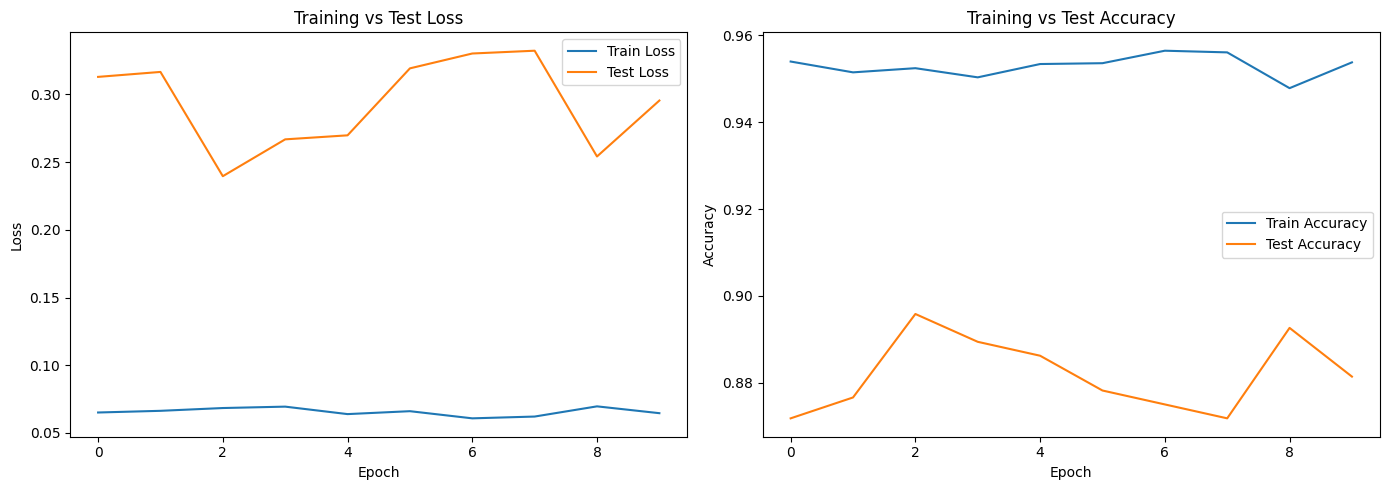

In [54]:
# 🔍 Plotting function
def plot_history(train_losses, test_losses, train_accs, test_accs):
    plt.figure(figsize=(14,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses,  label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Test Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs,  label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 📈 After training, call:
plot_history(train_losses, test_losses, train_accs, test_accs)

<Figure size 600x600 with 0 Axes>

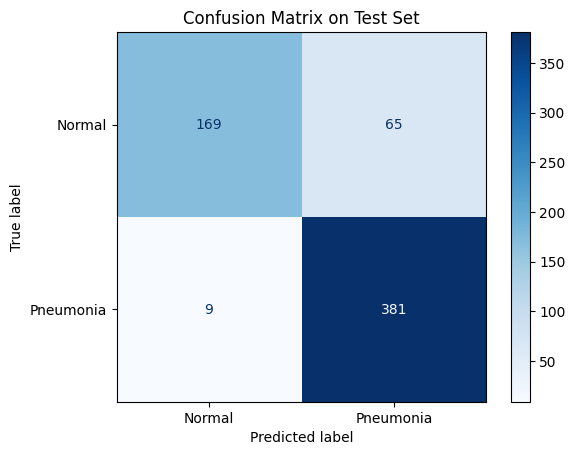

In [55]:
# 📊 Confusion Matrix on Test Set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Gather all predictions and true labels on the test set
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device, non_blocking=True)
        outputs = model(images)
        preds = (torch.sigmoid(outputs) > 0.5).int().cpu().numpy().flatten()
        y_pred.extend(preds)
        y_true.extend(labels.numpy().flatten())

# 2) Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Pneumonia'])
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix on Test Set')
plt.show()

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Gather all predictions & labels on test set
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device, non_blocking=True)
        outputs = model(images)
        preds   = (torch.sigmoid(outputs) > 0.5).int().cpu().numpy().flatten()
        y_pred.extend(preds)
        y_true.extend(labels.numpy().flatten())

# Compute metrics
precision = precision_score(y_true, y_pred)
recall    = recall_score(y_true, y_pred)
f1        = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Precision: 0.8543
Recall:    0.9769
F1 Score:  0.9115


In [61]:
#Load best model
model.load_state_dict(torch.load('final_chexnet_finetuned.pth'))
model.eval()

'''XRV-DenseNet121-densenet121-res224-all'''

'XRV-DenseNet121-densenet121-res224-all'

Upload a Chest X-ray image...


Saving IM-0131-0001.jpeg to IM-0131-0001 (2).jpeg
Prediction score for Pneumonia: 0.0596
Predicted: ✅ Normal (Confidence: 94.04%)


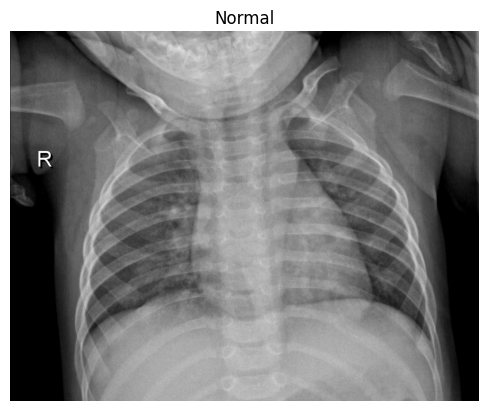

In [63]:
#Predict function using fine-tuned model
def predict_xray(img_path, model, threshold=0.5):
    img = Image.open(img_path).convert('L')
    img_tensor = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img_tensor)
        score = torch.sigmoid(output[0]).item()
        print(f"Prediction score for Pneumonia: {score:.4f}")
        if score > threshold:
            print(f"Predicted: 🔥 Pneumonia (Confidence: {score*100:.2f}%)")
        else:
            print(f"Predicted: ✅ Normal (Confidence: {(1-score)*100:.2f}%)")
    plt.imshow(img, cmap='gray')
    plt.title("Pneumonia" if score>threshold else "Normal")
    plt.axis('off'); plt.show()

#Upload & Predict
print("Upload a Chest X-ray image...")
uploaded = files.upload()
for fn in uploaded.keys(): predict_xray(fn, model)

In [62]:
# List all PyTorch checkpoints, sorted by modification time (newest first)
!ls -lt *.pth

-rw-r--r-- 1 root root 28411202 Apr 27 21:25 final_chexnet_finetuned.pth
-rw-r--r-- 1 root root 28410470 Apr 27 21:06 best_chexnet_finetuned.pth


In [64]:
from google.colab import files
files.download('final_chexnet_finetuned.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>